In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import adjusted_rand_score

In [ ]:
df = pd.read_csv("../data/heart_disease_selected_features.csv")

In [3]:
X = df.drop(columns="target")
y = df["target"]

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [5]:
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)


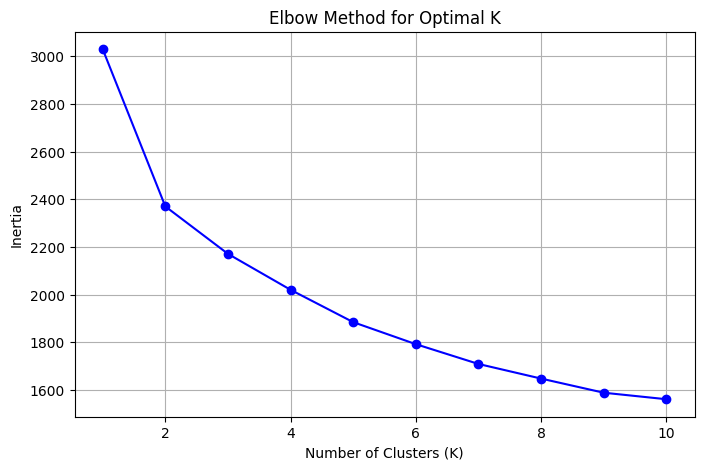

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.grid()
plt.savefig("../results/elbow_method.png", dpi=300)
plt.show()

In [7]:
optimal_k = 2
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df["KMeans_Cluster"] = kmeans.fit_predict(X_scaled)


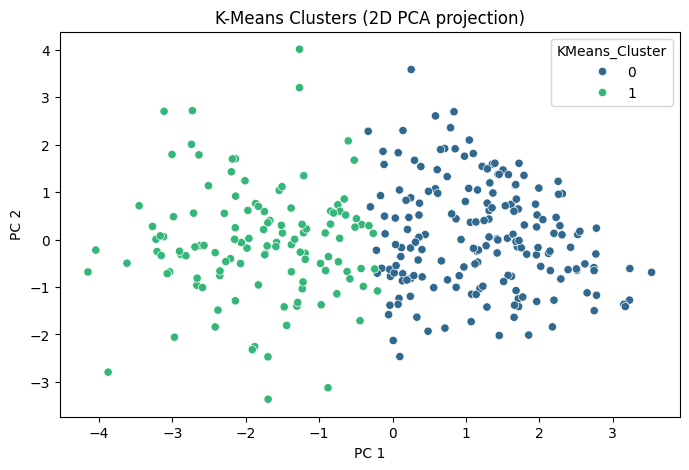

In [ ]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(X_scaled)

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_vis[:,0], y=X_vis[:,1],
                hue=df["KMeans_Cluster"], palette="viridis")
plt.title("K-Means Clusters (2D PCA projection)")
plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.show()

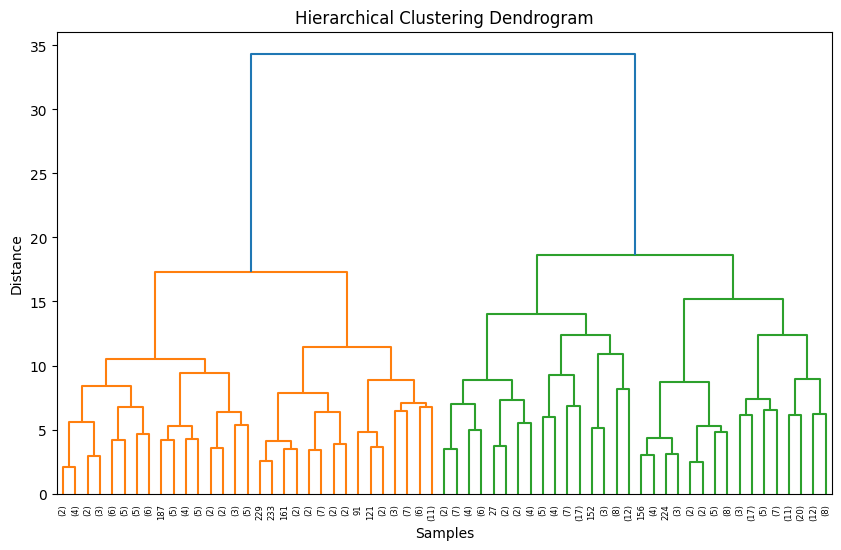

In [ ]:
linked = linkage(X_scaled, method="ward")
plt.figure(figsize=(10, 6))
dendrogram(linked, truncate_mode="level", p=5)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Distance")
plt.savefig("../results/hierarchical_dendrogram.png", dpi=300)
plt.show()

In [11]:
hc = AgglomerativeClustering(n_clusters=optimal_k, linkage="ward")
df["HC_Cluster"] = hc.fit_predict(X_scaled)

In [12]:
ari_kmeans = adjusted_rand_score(y, df["KMeans_Cluster"])
ari_hc = adjusted_rand_score(y, df["HC_Cluster"])

In [15]:
print(f"Adjusted Rand Index (KMeans): {ari_kmeans:.3f}")
print(f"Adjusted Rand Index (Hierarchical): {ari_hc:.3f}")

Adjusted Rand Index (KMeans): 0.324
Adjusted Rand Index (Hierarchical): 0.365


In [ ]:
df.to_csv("../data/clustering_results.csv", index=False)
print("✔ Results saved in clustering_results.csv")

✔ Results saved in clustering_results.csv
